In [1]:
!pip install jalali-pandas 

In [2]:
!pip install ta

In [34]:
! pip install bayesian-optimization

In [23]:
import numpy as np
import pandas as pd

import pytse_client as tse
from pytse_client.download import download_financial_indexes

import jalali_pandas

import ta

import matplotlib.pyplot as plt

In [4]:
url = 'https://raw.githubusercontent.com/Hamtech-ai/iran-stock-market/Alireza_feature_extraction/initFeatures.csv'
all_features = pd.read_csv(url)
all_features.head()

,jdate,date,open,high,low,adjClose,value,volume,count,yesterday,...,SMA80d,SMA_position,STOCH_fast,STOCH_slow,last_STOCH_fast,last_STOCH_slow,STOCH_position,RSI,RSI_position,label
0,1388-02-15,2009-05-05,15.0,15.0,15.0,15.0,1081376640,586112,41,15.0,...,15.4625,0.0,100.0,80.0,100.0,80.0,1.0,49.815169,1.0,1.0
1,1388-02-16,2009-05-06,15.0,15.0,15.0,15.0,91486200,49452,11,15.0,...,15.4500,0.0,100.0,80.0,100.0,80.0,1.0,49.815169,1.0,1.0
2,1388-03-16,2009-06-06,17.0,17.0,17.0,17.0,92080076321,45028304,1321,16.0,...,15.2250,0.0,100.0,100.0,100.0,80.0,1.0,72.012437,0.0,1.0
3,1388-03-17,2009-06-07,17.0,17.0,17.0,17.0,112619748590,54450733,964,17.0,...,15.2250,0.0,100.0,100.0,100.0,100.0,1.0,72.012437,0.0,1.0
4,1388-03-18,2009-06-08,17.0,18.0,17.0,17.0,9405809014,4426340,253,17.0,...,15.2250,0.0,100.0,100.0,100.0,100.0,1.0,72.012437,0.0,1.0


## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

X = all_features.drop(['label', 'jdate','date'], axis =1)
y = all_features['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, random_state = 0)

## Hyperparameter tuning of Adaboost

In [6]:
# importing all the necessary modules
## to find out the optimum number of decision stumps needed for the dataset

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

## Building various AdaBoost models

In [7]:
# Creating a function that builds different AdaBoost models.
# Specifying a different number of decision stamps from 50 to 1000 for the model.

# fuction to create models
def build_models():
    
    # dic of models
    Ada_models = dict()
    
    # number of decision stumps
    decision_stump= [10, 50, 100, 500, 1000]
        
    # using for loop to iterate though trees
    for i in decision_stump:
        
        # building model with specified trees
        Ada_models[str(i)] = AdaBoostClassifier(n_estimators=i)
    return Ada_models

build_models()

{'10': AdaBoostClassifier(n_estimators=10),
 '50': AdaBoostClassifier(),
 '100': AdaBoostClassifier(n_estimators=100),
 '500': AdaBoostClassifier(n_estimators=500),
 '1000': AdaBoostClassifier(n_estimators=1000)}

## The validation of the models

In [8]:
# Building a function to validate models using the cross-validation method. 
# The function returns the accuracy score of the models.

## input output

def evaluate_model(model, Input, Ouput):
    
    # defining the method of validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    
    # validating the model based on the accurasy score
    accuracy = cross_val_score(model, Input, Ouput, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # accuracy score- hyperparameter tuning of Adaboost
    return accuracy

In [9]:
# Calling the above functions to create models and evaluate them based on the accuracy score

# calling the build_models function
models = build_models()

# creating list
results, names = list(), list()

# using for loop to iterate thoug the models
for name, model in models.items():
    
    # calling the validation function
    scores = evaluate_model(model, X, y)
    
    # appending the accuray socres in results
    results.append(scores)
    names.append(name)
    
    # printing results of hyperparameter tuning of Adaboost
    print('---->Stump tree (%s)---Accuracy( %.5f)' % (name, mean(scores)))
    

---->Stump tree (10)---Accuracy( 0.75912)
---->Stump tree (50)---Accuracy( 0.81580)
---->Stump tree (100)---Accuracy( 0.84562)
---->Stump tree (500)---Accuracy( 0.90972)
---->Stump tree (1000)---Accuracy( 0.92550)


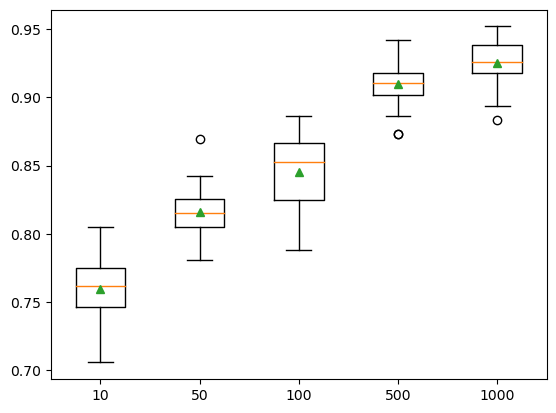

In [11]:
# plotting box plot of the 
plt.boxplot(results, labels=names, showmeans=True)
# showing the plot
plt.show()

## 1. Tunning the weak learner in AdaBoost

In [12]:
# Creating a function that builds models for trees of different depths.

def build_models():
    
    models = dict()
    
    # specifying the depth of trees
    for i in range(1,8):
        
        # model
        base_model = DecisionTreeClassifier(max_depth=i)
        
        # creating dic of modles
        models[str(i)] = AdaBoostClassifier(base_estimator=base_model)
        
    # returining the model -results of hyperparameter tuning of Adaboost
    return models

In [15]:
# Calling Functions and Finding the Optimal Depth for the Weak Learner AdaBoost:

from sklearn.tree import DecisionTreeClassifier

models = build_models()

# creating lists 
results, names = list(), list()

# iterating through the models
for name, model in models.items():
    
    # calling the evalution function
    accuracy = evaluate_model(model, X, y)
    
    # appending the results
    results.append(accuracy)
    names.append(name)
    
    # printing results of hyperparameter tuning of Adaboost
    print('---->Stump tree (%s)---Accuracy( %.5f)' % (name, mean(accuracy)))

---->Stump tree (1)---Accuracy( 0.81098)
---->Stump tree (2)---Accuracy( 0.89271)
---->Stump tree (3)---Accuracy( 0.90950)
---->Stump tree (4)---Accuracy( 0.90674)
---->Stump tree (5)---Accuracy( 0.89727)
---->Stump tree (6)---Accuracy( 0.89258)
---->Stump tree (7)---Accuracy( 0.89727)


#### The accuracy increases to 3 depth and then starts decreasing. So, the optimum depth for weak learners is 3.

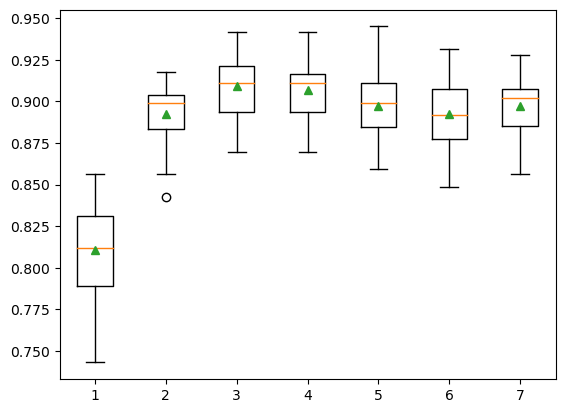

In [17]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

## 2. Tuning learning rate in AdaBoost (the step size of each iteration)

In [24]:
# creating a function that will create multiple models with different values of learning rate

def build_models():
    
    models = dict()
    
    # learning rate for various values
    for i in np.arange(0.1, 2.1, 0.1):
        key = '%.3f' % i
        
        # models in dic
        models[key] = AdaBoostClassifier(learning_rate=i)
    
    # returning models -results of hyperparameter tuning of Adaboost
    return models

In [26]:
# calling the evaluation function

models = build_models()

# creating the list
results, names = list(), list()

# iterate through the models
for name, model in models.items():
    
    # calling the evaluting function
    accuracy = evaluate_model(model, X, y)
    
    # storing the accurcy
    results.append(accuracy)
    names.append(name)
    
    # printing results of hyperparameter tuning of Adaboost
    print('---->Stump tree (%s)---Accuracy( %.5f)' % (name, mean(accuracy)))

---->Stump tree (0.100)---Accuracy( 0.75032)
---->Stump tree (0.200)---Accuracy( 0.78219)
---->Stump tree (0.300)---Accuracy( 0.79054)
---->Stump tree (0.400)---Accuracy( 0.79728)
---->Stump tree (0.500)---Accuracy( 0.80059)
---->Stump tree (0.600)---Accuracy( 0.79762)
---->Stump tree (0.700)---Accuracy( 0.80597)
---->Stump tree (0.800)---Accuracy( 0.80859)
---->Stump tree (0.900)---Accuracy( 0.80847)
---->Stump tree (1.000)---Accuracy( 0.81557)
---->Stump tree (1.100)---Accuracy( 0.81556)
---->Stump tree (1.200)---Accuracy( 0.81978)
---->Stump tree (1.300)---Accuracy( 0.82265)
---->Stump tree (1.400)---Accuracy( 0.82174)
---->Stump tree (1.500)---Accuracy( 0.81865)
---->Stump tree (1.600)---Accuracy( 0.82620)
---->Stump tree (1.700)---Accuracy( 0.82208)
---->Stump tree (1.800)---Accuracy( 0.81442)
---->Stump tree (1.900)---Accuracy( 0.78996)
---->Stump tree (2.000)---Accuracy( 0.29069)


#### we have optimum accuracy when the learning rate is equal to 1.6

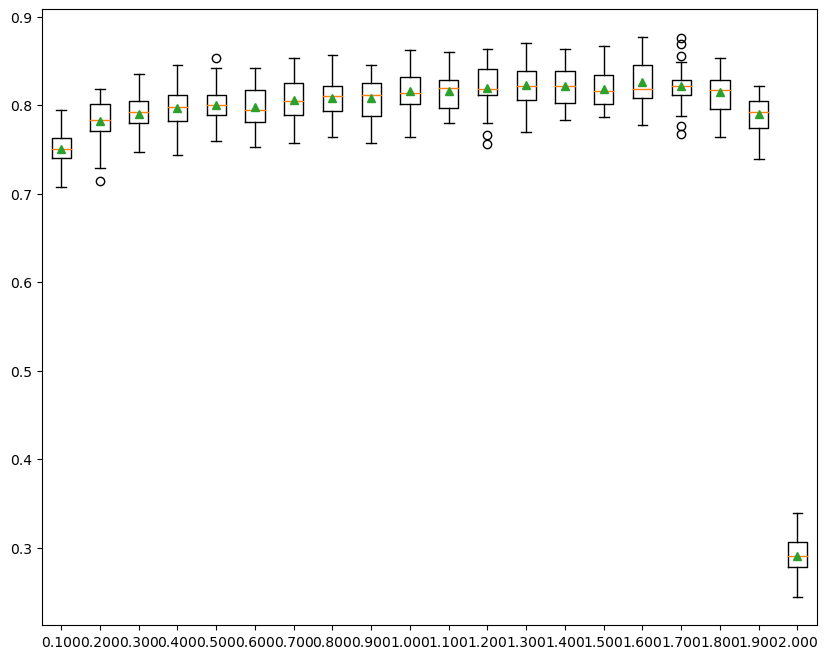

In [29]:
# fixing the size
plt.figure(figsize=(10, 8))
# plotting the values
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## Hyperparameter tuning of ada boost using gridSearchCV

In [32]:
# find the optimum values for the parameters of the Ada boost algorithm 
# GridSearchCV takes every possible value ( specified ones) and train the model on the different combination 

from sklearn.model_selection import GridSearchCV

# defining the classifier
model = AdaBoostClassifier()

# creating a dic for the grid
grid = dict()

# estimator till 500
grid['n_estimators'] = [10, 50, 100, 200, 500]

# defining learning rate
grid['learning_rate'] = [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2]

# defining the CV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

# initializing the grid search
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# training the model on grid search for hyperparameter tuning of Adaboost
grid_result = grid_search.fit(X, y)

# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.914072 using {'learning_rate': 1.2, 'n_estimators': 500}


In [43]:
from bayes_opt import BayesianOptimization

# defining the classifier
model = AdaBoostClassifier()

# creating a dic for the grid
bays = dict()

# estimator till 500
bays['n_estimators'] = [10, 50, 100, 200, 500]

# defining learning rate
bays['learning_rate'] = [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2]

# defining the CV
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

# initializing the grid search
bays_opt = BayesianOptimization(f = model, pbounds = bays, random_state = 1)

optimizer.maximize(init_points = 2, n_iter = 3)

print(optimizer.space.keys)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.